In [65]:
import pandas as pd

df = pd.read_csv(r"C:\Users\MSI\gomycode\titanic-passengers-new.csv", sep=',')

df.head(7)

,Unnamed: 0,Title,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,period,FamilySize
0,0,Mr,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,0,0,0
1,1,Mr,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,0,0,0
2,2,Mr,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,0,0,0
3,3,Mrs,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,0,4,4
4,4,Mr,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,0,1,1
5,5,Mr,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,G6,0,2,2
6,6,Mr,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,G6,0,0,0


In [66]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Title',axis=1, inplace=True )
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df.Survived, test_size=0.3)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [69]:
DT = DecisionTreeClassifier()


In [70]:

DT.fit(X_train, y_train)   
y_pred=DT.predict(X_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.75


In [91]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,period,FamilySize
821,327,3,0,61.0,0,0,6.2375,0,0,0
613,701,1,1,18.0,1,0,227.5250,1,1,1
100,197,3,0,24.0,0,0,7.7500,2,0,0
763,690,1,1,15.0,0,1,211.3375,0,1,1
164,610,1,1,40.0,0,0,153.4625,0,0,0
...,...,...,...,...,...,...,...,...,...,...
608,128,3,0,24.0,0,0,7.1417,0,0,0
605,163,3,0,26.0,0,0,7.7750,0,0,0
136,499,1,1,25.0,1,2,151.5500,0,3,3
6,576,3,0,19.0,0,0,14.5000,0,0,0


In [92]:
y_test

821    0
613    1
100    0
763    1
164    1
      ..
608    1
605    0
136    0
6      0
709    0
Name: Survived, Length: 268, dtype: int64

In [96]:
df.columns.drop('Survived')

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'period', 'FamilySize'],
      dtype='object')

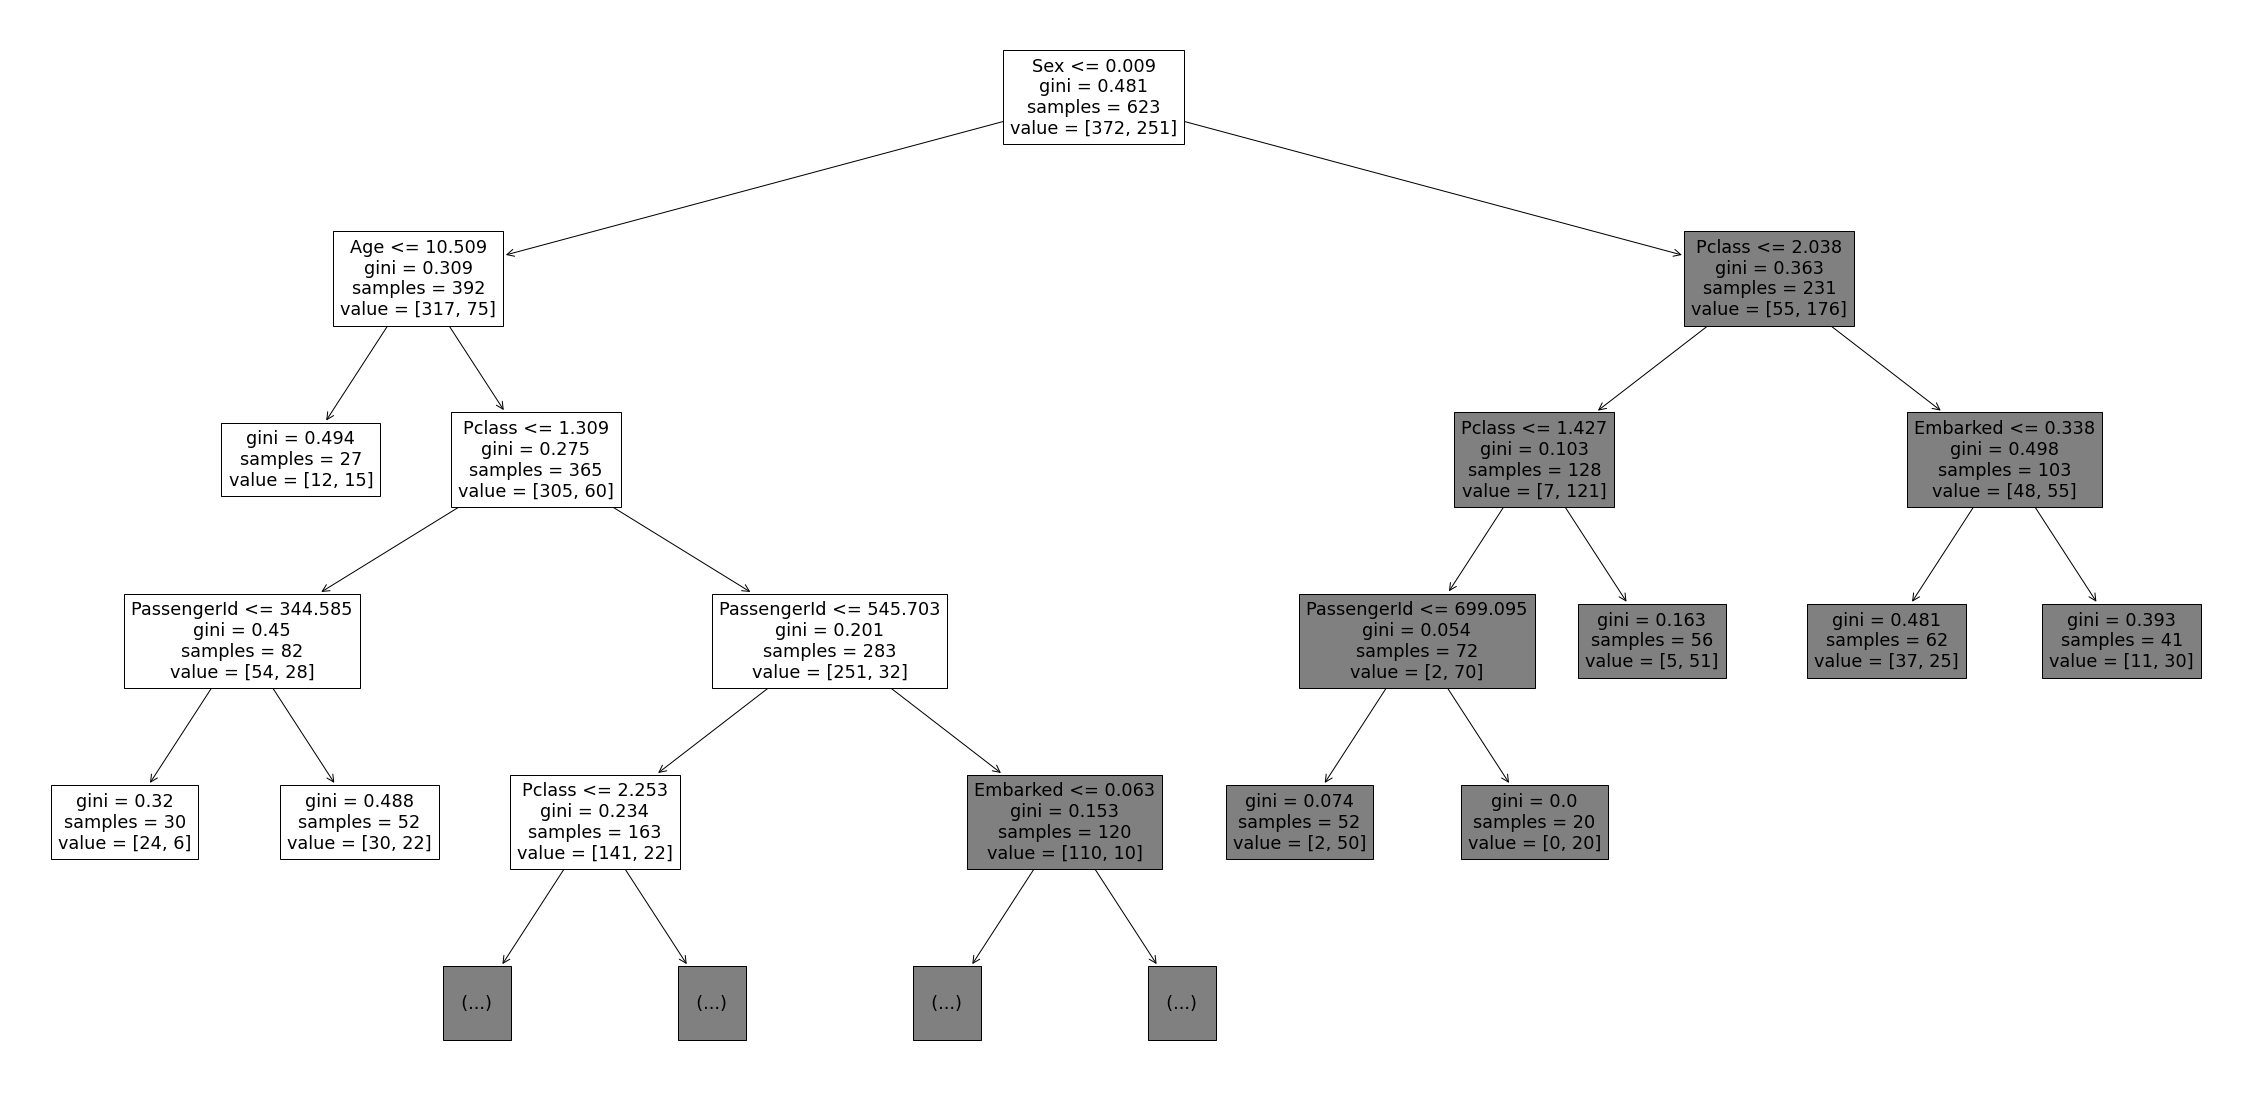

In [125]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(40,20))
plot_tree(DT, max_depth=4, feature_names=df.columns.drop('Survived'));


for passenger 100, we will follow the decision tree path to determine the outcome "survived", sex=0<0,5 so we move on to the next node, age = 24> 6,5 we move on to thenext node on the right, Pclass=3>1,5, we will move down to the next path on the right 7,7<7,91 ; we arrive at the last node where the number of those that did not survive is higher than those who did => the result for passenger 100 --> 0 (did not survive)


In [132]:
DT = DecisionTreeClassifier(criterion = 'gini', splitter ='random', max_leaf_nodes = None, min_samples_leaf = 20, max_depth = 7)

In [133]:
DT.fit(X_train, y_train)   
y_pred=DT.predict(X_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7985074626865671


increasing the min number of samples for each leaf to 20 and defining max depth to 7 and an infinite limit on the number of nodes, we get an accuracy score of 0,798507 higher than the previous score of 0,75

In [112]:
from sklearn import datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  

In [131]:
clf=RandomForestClassifier(n_estimators=300,min_samples_split = 7, max_depth=8)  
clf.fit(X_train, y_train)  
y_pred=clf.predict(X_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  


Accuracy: 0.8022388059701493


the accuracy using the random forest method is higher compared to using a simple unique decision tree 